In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_parquet(r"D:\NYC_taxi_fair_prediction_mlops\NYC_taxi_fair_prediction_mlops\Raw_data\yellow_tripdata_v1.parquet")

In [3]:
raw_data_columns = list(data_raw.columns)
print(f"total raw columns : {len(raw_data_columns)}")
print(f"Raw data columns: \n {raw_data_columns}")



total raw columns : 20
Raw data columns: 
 ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee']


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [5]:
data_raw

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.00,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.00
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.10,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.00
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.10,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.00
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.20,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.00
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.80,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475221,2,2025-01-31 23:01:48,2025-01-31 23:16:29,NaN,3.35,NaN,None,79,237,0,15.85,0.0,0.5,0.00,0.0,1.0,20.60,NaN,NaN,0.75
3475222,2,2025-01-31 23:50:29,2025-02-01 00:17:27,NaN,8.73,NaN,None,161,116,0,28.14,0.0,0.5,0.00,0.0,1.0,32.89,NaN,NaN,0.75
3475223,2,2025-01-31 23:26:59,2025-01-31 23:43:01,NaN,2.64,NaN,None,144,246,0,14.91,0.0,0.5,0.00,0.0,1.0,19.66,NaN,NaN,0.75
3475224,2,2025-01-31 23:14:34,2025-01-31 23:34:52,NaN,3.16,NaN,None,142,107,0,17.55,0.0,0.5,0.00,0.0,1.0,22.30,NaN,NaN,0.75


In [6]:
columns_to_remove = ["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "RatecodeID", "store_and_fwd_flag",
                     "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge", "Airport_fee" ,"cbd_congestion_fee"]
len(columns_to_remove)

14

## EDA

In [7]:
data_raw.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          540149
trip_distance                 0
RatecodeID               540149
store_and_fwd_flag       540149
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     540149
Airport_fee              540149
cbd_congestion_fee            0
dtype: int64

In [8]:
data_raw_selected = data_raw.drop(columns=columns_to_remove, axis=1)

In [9]:
data_raw_selected.isna().sum()

passenger_count    540149
trip_distance           0
PULocationID            0
DOLocationID            0
payment_type            0
fare_amount             0
dtype: int64

In [10]:
data_raw_selected.passenger_count.value_counts()

passenger_count
1.0    2322434
2.0     407761
3.0      91409
4.0      59009
0.0      24656
5.0      17786
6.0      12004
8.0         11
7.0          4
9.0          3
Name: count, dtype: int64

In [11]:
len(data_raw_selected)

3475226

In [12]:
data_raw_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float64
 1   trip_distance    float64
 2   PULocationID     int32  
 3   DOLocationID     int32  
 4   payment_type     int64  
 5   fare_amount      float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 132.6 MB


<Axes: xlabel='passenger_count', ylabel='fare_amount'>

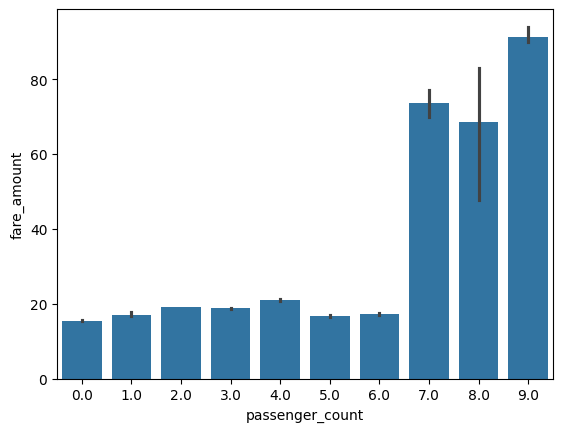

In [13]:
sns.barplot(data=data_raw_selected, x="passenger_count", y="fare_amount")

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

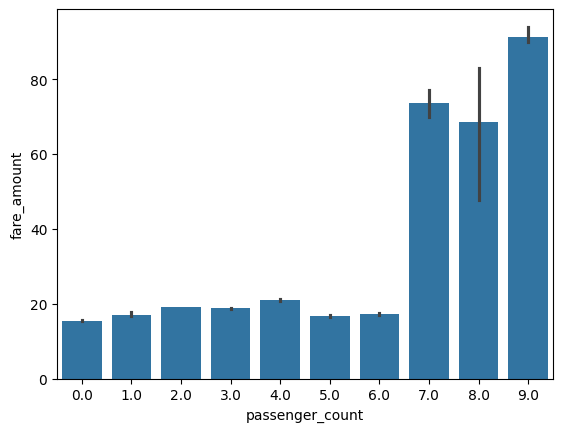

In [14]:
sns.barplot(data=data_raw_selected, x="passenger_count", y="fare_amount")

In [15]:
data_raw_selected["trip_distance"].describe()

count    3.475226e+06
mean     5.855126e+00
std      5.646016e+02
min      0.000000e+00
25%      9.800000e-01
50%      1.670000e+00
75%      3.100000e+00
max      2.764236e+05
Name: trip_distance, dtype: float64

In [16]:
data_raw_selected["trip_distance"]

0          1.60
1          0.50
2          0.60
3          0.52
4          0.66
           ... 
3475221    3.35
3475222    8.73
3475223    2.64
3475224    3.16
3475225    2.29
Name: trip_distance, Length: 3475226, dtype: float64

In [17]:
np.percentile(data_raw_selected['trip_distance'], 99)

np.float64(19.5)

<Axes: xlabel='trip_distance', ylabel='Count'>

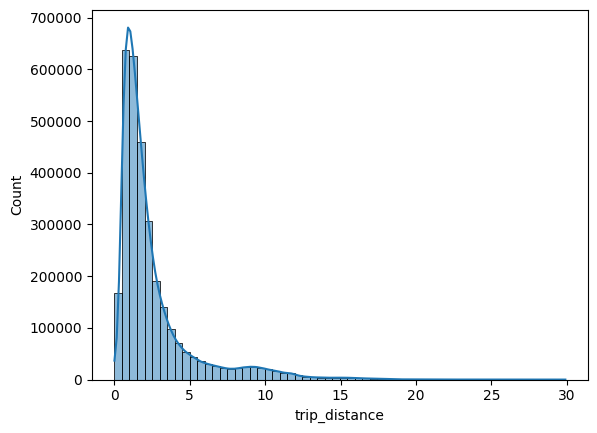

In [26]:
df = data_raw_selected.query("0 < trip_distance < 30 and 0<=fare_amount<70.0")

sns.histplot(df["trip_distance"], bins=60, kde=True)

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

d:\NYC_taxi_fair_prediction_mlops\.venv\Lib\site-packages\IPython\core\events.py:96: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
d:\NYC_taxi_fair_prediction_mlops\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


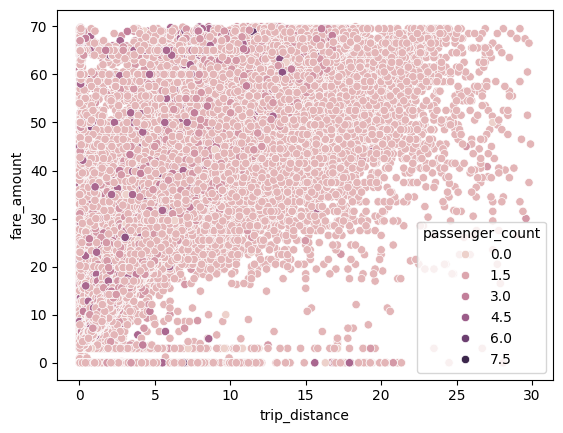

In [35]:
sns.scatterplot(x=df["trip_distance"], y=df["fare_amount"], hue=df["passenger_count"])

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

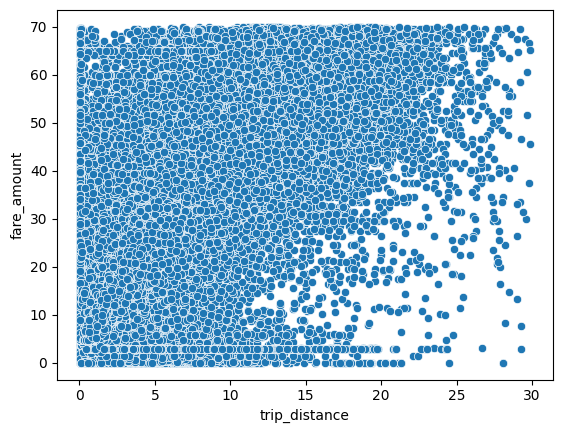

In [36]:
sns.scatterplot(x=df["trip_distance"], y=df["fare_amount"])

In [28]:
df.fare_amount.describe()

count    3.131022e+06
mean     1.560899e+01
std      1.050736e+01
min      0.000000e+00
25%      8.600000e+00
50%      1.211000e+01
75%      1.840000e+01
max      6.997000e+01
Name: fare_amount, dtype: float64

In [24]:
np.percentile(df.fare_amount, 99)

np.float64(54.8)

In [34]:
data_raw_selected.duplicated().sum()

np.int64(953292)